# 0. Introduccion

## 0.1. Datos de notebook
### Sección: FUNDAMENTOS DE MACHINE LEARNING_003D
### Integrantes:
- Fabian Muñoz
- Matias Perez
- Gabriel Soto

## 0.2. Cargamos librerias y datos

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
print(os.listdir())
import warnings
warnings.filterwarnings('ignore')

['.git', 'column_2C_weka.csv', 'et_ml.ipynb', 'requeriments.txt']


### El csv los cargamos de manera local debido a que no usaremos collab

In [121]:
name= "column_2C_weka.csv"
df = pd.read_csv(name,sep=";")

paraConvertir = ['incidencia_pelvica', 'inclinacion_pelvica', ' angulo_lordosis_lumbar', 'pendiente_sacra', 'radio_pelvico', 'grado_espondilolistesis']
def ConvertirAFloat(df, columna):
    df[columna] = df[columna].str.replace(',', '.').astype(float)
    return df

for columna in paraConvertir:
    df = ConvertirAFloat(df, columna)

df.head(10)

,incidencia_pelvica,inclinacion_pelvica,angulo_lordosis_lumbar,pendiente_sacra,radio_pelvico,grado_espondilolistesis,clase
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Anormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Anormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Anormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Anormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Anormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Anormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Anormal
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Anormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Anormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Anormal


# 1. Analisis exploratorio de los datos (EDA)

## 1.1. Verificar que la columna Clase sólo tenga las categorías Normal y Anormal

In [122]:
df_clase = df[df['clase'].isin(['Anormal', 'Normal'])]
df_clase['clase'].value_counts()

clase
Anormal    210
Normal     100
Name: count, dtype: int64

<span style="color:lime">Podemos notar que entre las 2 clases existen 310 casos, los cuales 210 son anormales y 100 son normales</span>

## 1.2. Efectúe Análisis de Valores Perdidos (missing values) y corríjalos, si procede.
 

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   incidencia_pelvica       310 non-null    float64
 1   inclinacion_pelvica      310 non-null    float64
 2    angulo_lordosis_lumbar  310 non-null    float64
 3   pendiente_sacra          310 non-null    float64
 4   radio_pelvico            310 non-null    float64
 5   grado_espondilolistesis  310 non-null    float64
 6   clase                    310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [124]:
df.isnull().sum()

incidencia_pelvica         0
inclinacion_pelvica        0
 angulo_lordosis_lumbar    0
pendiente_sacra            0
radio_pelvico              0
grado_espondilolistesis    0
clase                      0
dtype: int64

<span style="color:lime">No existen valores perdidos (missing values) o nulos, por lo que no hay necesidad de corregir</span> 

## 1.3.  Presente mediante un heatmat con el estado de las columnas para verificar la corrección aplicada a los valores perdidos, si procede.

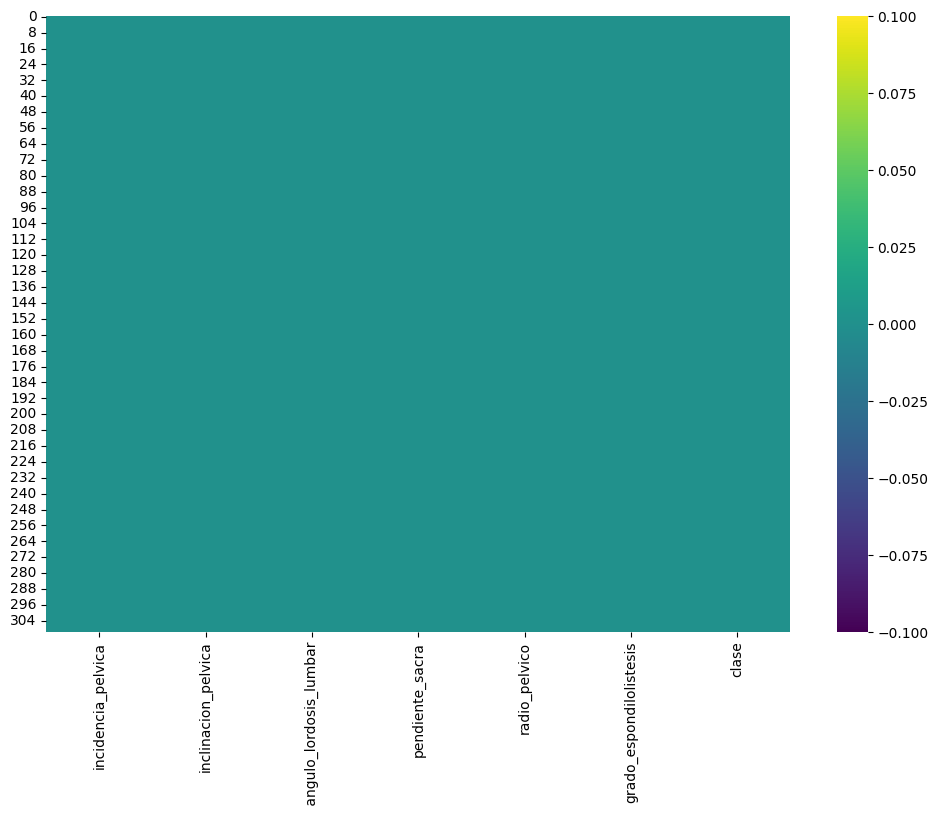

In [125]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

<span style="color:lime">Podemos apreciar que no existen valores perdidos en el dataset, ya que todos los campos se encuentran en el rango de color celest, lo que indica que no hay valores perdidos.</span>.

## 1.4. Presente los valores estadísticos descriptivos de las columnas del dataframe

In [126]:
df.describe()

,incidencia_pelvica,inclinacion_pelvica,angulo_lordosis_lumbar,pendiente_sacra,radio_pelvico,grado_espondilolistesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


## 1.5. Presente histograma de cada una de las variables


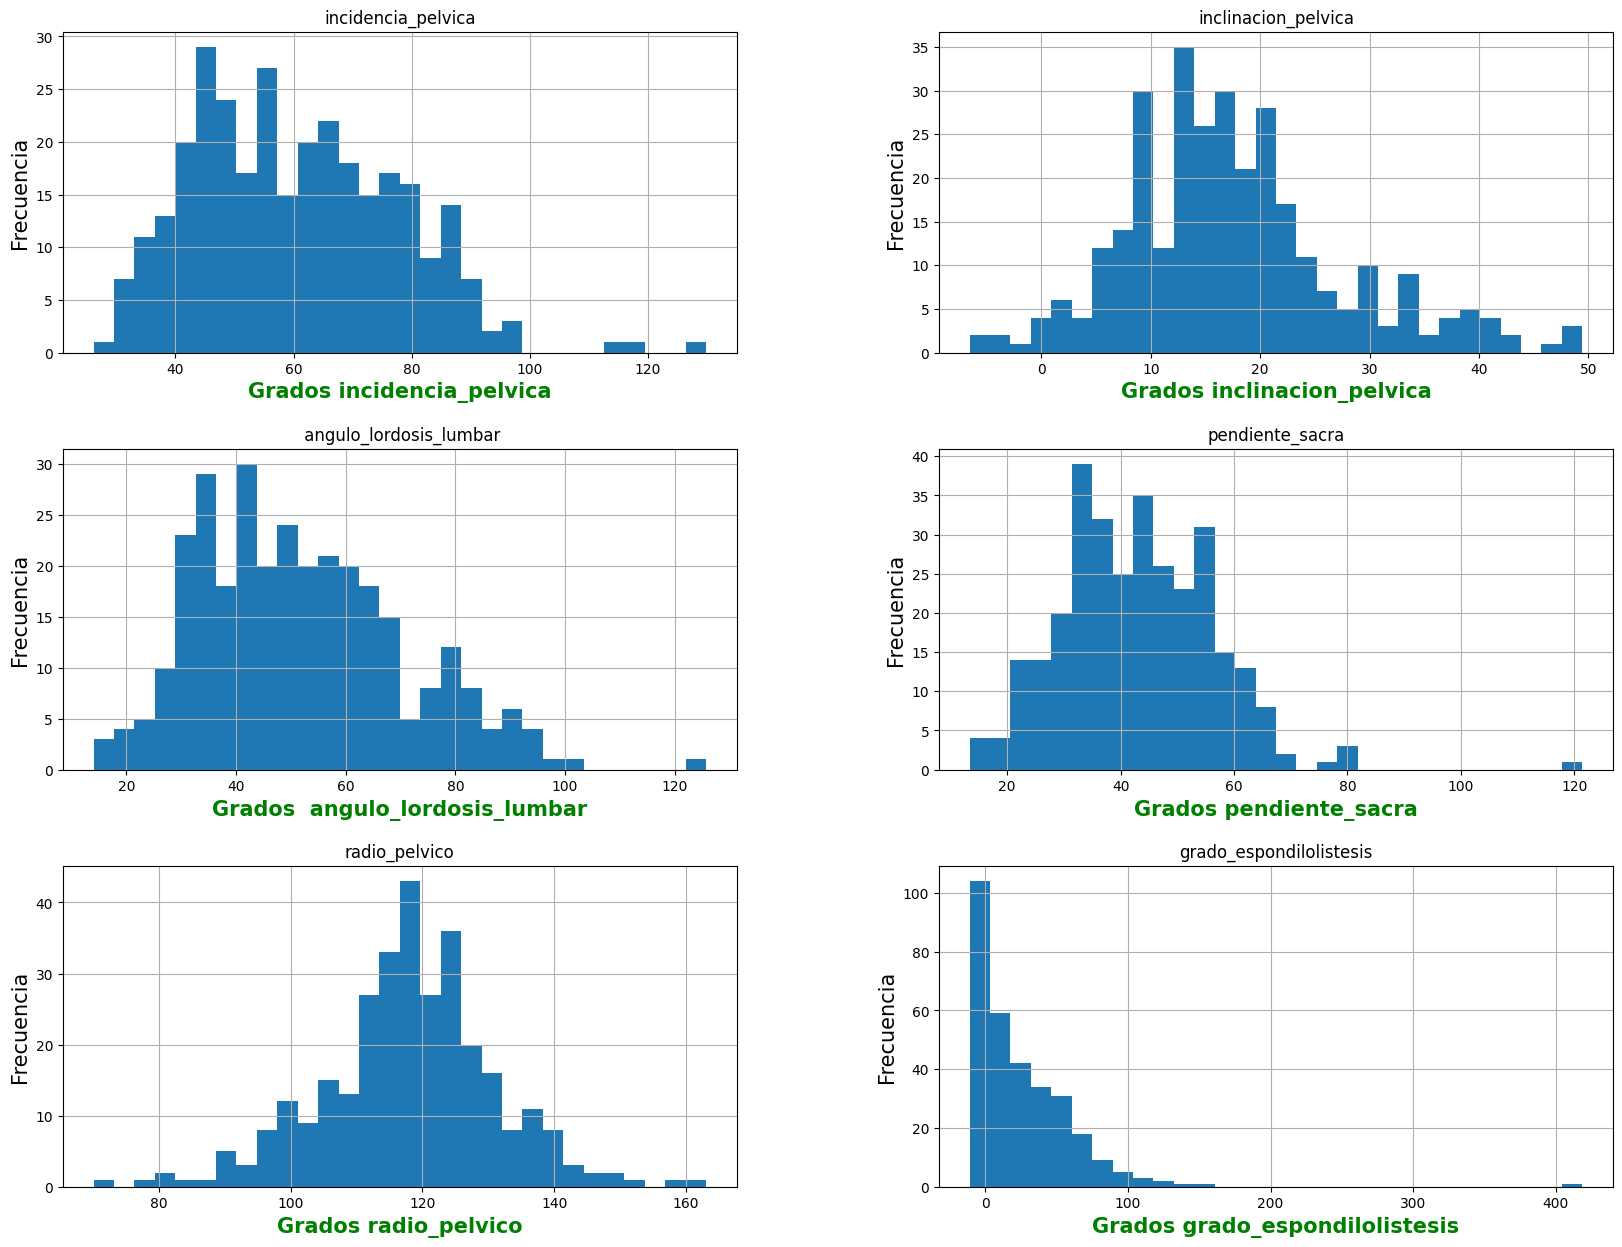

In [127]:
histogramas = df.hist(bins=30, figsize=(20,15))

for histo in histogramas.flatten():
    histo.set_xlabel(f"Grados {histo.get_title()}")
    histo.set_ylabel("Frecuencia")
    histo.xaxis.label.set_color('green')  
    histo.xaxis.label.set_weight('bold')  
    histo.xaxis.label.set_size(15) 
    histo.yaxis.label.set_size(15)

plt.show()

# 2. Análisis

## 2.1. Presente en un histograma como se distribuyen los valores de la columna a predecir

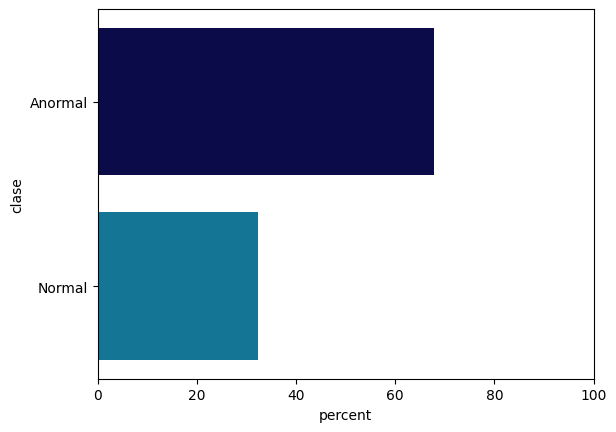

In [128]:
sns.countplot(df['clase'],palette='ocean',stat='percent').set_xlim([0, 100])
plt.show()


## 2.2.  Presente el porcentaje de distribución de cada clase

In [129]:
total = df.clase.value_counts(normalize="true")
print(round(total*100,1))

clase
Anormal    67.7
Normal     32.3
Name: proportion, dtype: float64


## 2.3. Presente la matriz de correlación 
Podemos observar que las variables son muy independientes con ligeras semejanzas con algunas.

<function matplotlib.pyplot.show(close=None, block=None)>

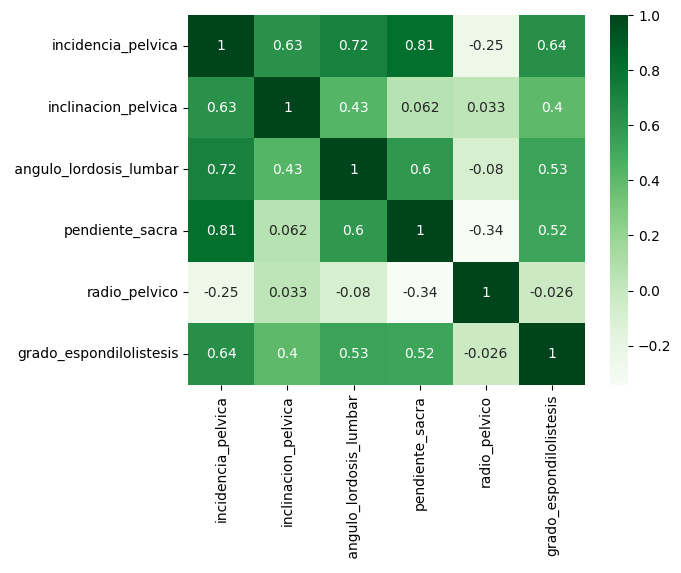

In [130]:
dfSinClase = df[paraConvertir].copy()
correlacion = dfSinClase.corr()
sns.heatmap(correlacion, annot=True, cmap='Greens') # color creeper de maincra xdddddddddd
plt.show

## 2.4. De ser necesario escale los datos del dataframe (si procede)
### En este caso no es necesario escalar los datos ya que todos se encuentran en el mismo rango de valores, de todas formas hicimos el ejercicio igual en un dataframe distinto que no alterara el original.

In [131]:
from sklearn.preprocessing import StandardScaler
escalador = StandardScaler()
escalador.fit(dfSinClase)
caracteristicasEscalador = escalador.transform(dfSinClase)
dfAlterno = pd.DataFrame(caracteristicasEscalador,columns=dfSinClase.columns)
dfAlterno.head()

,incidencia_pelvica,inclinacion_pelvica,angulo_lordosis_lumbar,pendiente_sacra,radio_pelvico,grado_espondilolistesis
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106


## 3. Preparación

## 3.1. Particione el dataframe en entrenamiento y prueba

In [132]:
from sklearn.model_selection import train_test_split
predictors = df.drop("clase",axis=1)
clase = df["clase"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,clase,test_size=0.20,random_state=0)
print("datos")
print("-"*30)
print(f"registros de entrenamiento: {X_train.shape[0]}")
print(f"registros de prueba:        {X_test.shape[0]}")

datos
------------------------------
registros de entrenamiento: 248
registros de prueba:        62


# 4. Para cada Modelo (1. regresión logística, 2. árbol de decisión, 3. bosques de árboles)

In [133]:
# Importar puntuaciones de presicion antes de comenzar
from sklearn.metrics import accuracy_score
X = df.drop(['clase'], axis=1)
Y = df.clase.copy()

## 4.1 Cree el modelo (regresión logística)

### 4.1.1. Presente el Classification report (precision, f1-score y recall)

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
scalerN = MinMaxScaler()
scalerN.fit(X)
XscaledN = scalerN.transform(X)
mo1 = LogisticRegression(solver='lbfgs')
mo1.fit(XscaledN, Y)
Y_pred_lr = mo1.predict(XscaledN)
print(classification_report(Y, Y_pred_lr))

              precision    recall  f1-score   support

     Anormal       0.76      0.94      0.84       210
      Normal       0.76      0.38      0.51       100

    accuracy                           0.76       310
   macro avg       0.76      0.66      0.67       310
weighted avg       0.76      0.76      0.73       310



### 4.1.2. Presente la matriz de confusión

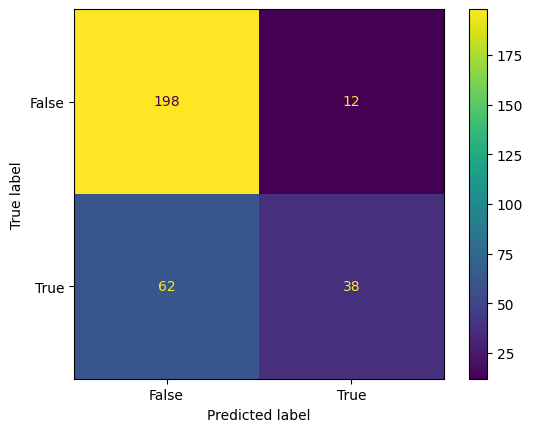

In [135]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y, Y_pred_lr)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### 4.1.3. Calcule y presente el ROC (Receiver Operation Characteristics)


In [136]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
enc = LabelEncoder()
Y1 = enc.fit_transform(Y)
Yhat1 = enc.fit_transform(Y_pred_lr)
roc_auc_score(Y1,Yhat1)

0.6614285714285714

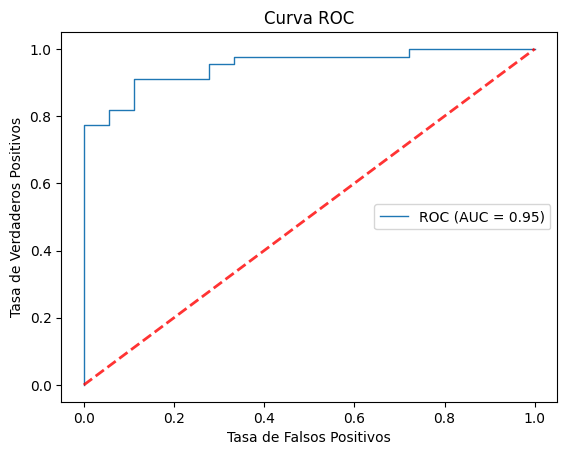

In [159]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Convertir datos de clases a 0 y 1 para poder manipular los datos, ya que son strings, y son solamente 2 datos, podemos tratarlos como binarios
y_binario = np.where(Y == 'Normal', 0, 1)

# Dividir datos en entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y_binario, test_size=0.2, random_state=42)

# Entrenamos nuestro modelo de regresion logistica
mo1.fit(X_entrenamiento, y_entrenamiento)

# Calculamos la probabilidad de clase positiva
y_posibilidad = mo1.predict_proba(X_prueba)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_prueba, y_posibilidad)

# Calcular el área bajo la curva o area under curve 
roc_auc = auc(fpr, tpr)

# Graficar la curva
plt.plot(fpr, tpr, lw=1 ,label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="center right")
plt.show()
